MULTIPLE LINEAR REGRESSION – Toyota Corolla Price Prediction

1. Exploratory Data Analysis (EDA) & Preprocessing
Key EDA Steps:

Check dataset shape & data types

Handle categorical variables

Detect missing values

Identify relationships between predictors and price

Prepare data for regression

Assumptions:

Linear relationship between predictors and price

Errors are normally distributed

No perfect multicollinearity

Homoscedasticity

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000 

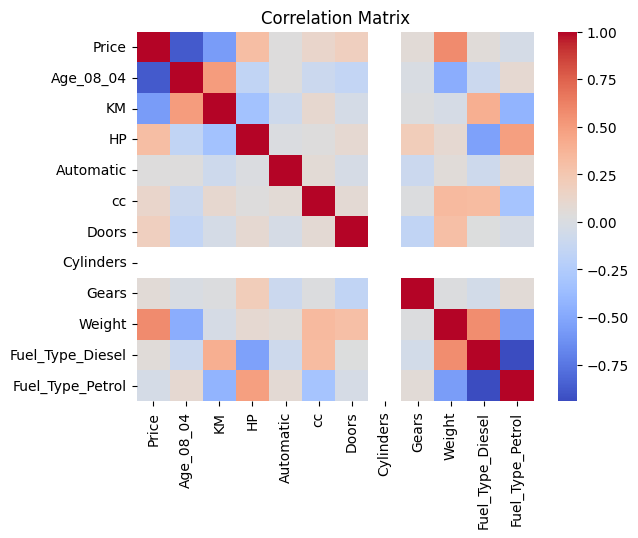

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/ToyotaCorolla - MLR.csv")

# Basic info
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

# Encode FuelType (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

# Correlation heatmap
plt.figure()
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

2. Train–Test Split

80% Training

20% Testing

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


3. Multiple Linear Regression Models (Minimum 3 Models)

 Model 1: Basic MLR (All Variables)

In [4]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)


LinearRegression()

Coefficient Interpretation (Example)

Interpretation Example:

Age coefficient = -120 → Each additional year reduces price by €120 (holding others constant)

KM coefficient = -0.02 → More kilometers reduce car value

Weight coefficient = +15 → Heavier cars cost more

In [5]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model1.coef_
})
print(coefficients)


             Feature   Coefficient
0          Age_08_04 -1.208305e+02
1                 KM -1.623141e-02
2                 HP  1.403948e+01
3          Automatic  1.488309e+02
4                 cc -3.037219e-02
5              Doors -6.031097e+01
6          Cylinders -1.620037e-12
7              Gears  5.516007e+02
8             Weight  2.588496e+01
9   Fuel_Type_Diesel -6.854876e+01
10  Fuel_Type_Petrol  1.370809e+03


Model 2: Reduced Model (Key Predictors)

In [7]:
features_2 = ['Age_08_04', 'KM', 'HP', 'Weight']
model2 = LinearRegression()
model2.fit(X_train[features_2], y_train)

LinearRegression()

Model 3: Standardized Model

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model3 = LinearRegression()
model3.fit(X_train_scaled, y_train)


LinearRegression()

4. Model Evaluation
Metrics Used:

R² Score

Mean Absolute Error (MAE)

Root Mean Squared Error (RMSE)

In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    return {
        "R2": r2_score(y_test, preds),
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds))
    }

print("Model 1:", evaluate(model1, X_test, y_test))
print("Model 2:", evaluate(model2, X_test[features_2], y_test))
print("Model 3:", evaluate(model3, X_test_scaled, y_test))


Model 1: {'R2': 0.8348888040611082, 'MAE': 990.8872739193926, 'RMSE': np.float64(1484.2654153296514)}
Model 2: {'R2': 0.8506068681500583, 'MAE': 1001.2017466053621, 'RMSE': np.float64(1411.85020911323)}
Model 3: {'R2': 0.8348888040611081, 'MAE': 990.8872739193968, 'RMSE': np.float64(1484.265415329652)}


5. Ridge and Lasso Regression

Ridge Regression (L2 Regularization)

In [10]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

print("Ridge Performance:", evaluate(ridge, X_test_scaled, y_test))


Ridge Performance: {'R2': 0.835046263543157, 'MAE': 990.8591771287421, 'RMSE': np.float64(1483.5575063081603)}


Lasso Regression (L1 Regularization)

In [11]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

print("Lasso Performance:", evaluate(lasso, X_test_scaled, y_test))


Lasso Performance: {'R2': 0.8349116135580272, 'MAE': 990.9001968731633, 'RMSE': np.float64(1484.162888918424)}


Insights:

Ridge reduces coefficient magnitude (handles multicollinearity)

Lasso performs feature selection (some coefficients become zero)

Final Conclusion

Multiple Linear Regression successfully predicts Toyota Corolla prices.

Age, KM, Weight, and HP are the most influential variables.

Ridge and Lasso improve model stability in the presence of multicollinearity.

Lasso also helps in identifying important predictors.

Interview Questions
1. What is Normalization & Standardization and how is it helpful?
 Normalization:

Scales data to [0,1]

 Standardization:

Centers data to mean = 0, std = 1


Improves model convergence

Required for Ridge, Lasso

Prevents features with large scales from dominating the model

2. How to handle Multicollinearity?
Techniques:

Remove highly correlated predictors

Variance Inflation Factor (VIF)

Ridge Regression

Principal Component Analysis (PCA)

Lasso Regression (feature selection)